In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime as dt
import math

import warnings
warnings.filterwarnings('ignore')


ca_categories = pd.read_json('KR_category_id.json')

ca_videos = pd.read_csv('KRvideos.csv',encoding='cyrillic'
                        
                        #, encoding='latin1'
                       )


In [2]:
ca_videos['trending_date'].sort_values()
print('Data collection start date: ', ca_videos['trending_date'].min())
print('Date collection end date: ', ca_videos['trending_date'].max())

Data collection start date:  17.01.12
Date collection end date:  18.31.05


### Publication Date

In [3]:
ca_videos['publish_time'] = pd.to_datetime(ca_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date
print('Original publication start date: ', ca_videos['publish_time'].min())
print('Original publication end date: ', ca_videos['trending_date'].max())

Original publication start date:  2011-09-29
Original publication end date:  18.31.05


## Categories

In [4]:
categories = {int(category['id']): category['snippet']['title'] for category in ca_categories['items']}
ca_videos["category_name"] = ca_videos["category_id"].map(categories)
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In the description above, we determined that #24 is the category with the most trending videos. Here we can see that it's entertainment.

## Boolean Data

Now we evaluate the boolean data, before moving on to the numerical data. 
There are three boolean variables: comment_disabled, ratings_disabled, and video_error_or_removed.

In [5]:
bool_data = ca_videos.select_dtypes(include = 'bool').apply(pd.Series.value_counts)
print(bool_data)
print()
print('Number of videos with comments and ratings disabled that have been removed: ', 
      len(ca_videos[(ca_videos["comments_disabled"] == True) & (ca_videos["ratings_disabled"] == True) & (ca_videos['video_error_or_removed'] == True)]))
print('Number of videos with both comments and ratings disabled: ',  
      len(ca_videos[(ca_videos["comments_disabled"] == True) & (ca_videos["ratings_disabled"] == True)]))

       comments_disabled  ratings_disabled  video_error_or_removed
False              34056             33167                   34526
True                 511              1400                      41

Number of videos with comments and ratings disabled that have been removed:  0
Number of videos with both comments and ratings disabled:  202


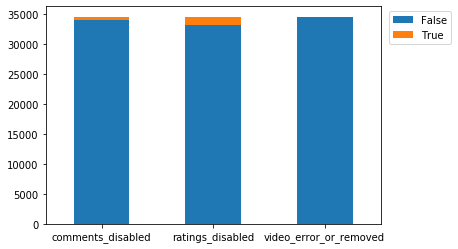

In [6]:
bool_data = bool_data.transpose()
bool_data.plot.bar(stacked = True)
plt.xticks(rotation = 'horizontal')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Clearly a very low percentage of videos have disabled comments, ratings, or have been removed due to error. 

In [7]:
ca_videos.loc[ca_videos['video_error_or_removed'] == True].head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
701,Jn9sOxMhwQA,17.17.11,Deleted video,WorkpointOfficial,24,2017-11-16,"рИрИЅрИДрИрИЂрЙрИ­рИрИЋрИЅрИБрИ|""рИЃрИВрИ...",683610,4596,485,1688,https://i.ytimg.com/vi/NdQf-JuBjp0/default.jpg,False,False,True,рИрИрИрИБрИрИЃрИВрИЂрИрИВрИЃ THE MASK SIN...,Entertainment
4763,39hCVM4T4PA,17.11.12,Deleted video,уИуЃуЄуЂуГушЊ­хЃВ,17,2017-12-09,"ыььььЛЕьЖъЕЌ эъЕ­ - ьЄъЕ­|""EAFF E-...",96334,223,88,39,https://i.ytimg.com/vi/6AH3XsWyyJ4/default.jpg,False,False,True,https://www.cia.gov,Sports
8879,LJsbf7KNVCA,18.05.01,Deleted video,News Express,25,2018-01-03,[none],110849,1262,99,372,https://i.ytimg.com/vi/65wCVplhoFg/default.jpg,False,False,True,"чО ьЌь ыААьЙь ыЈ ь ыЕ ььЁь , ыЖь...",News & Politics
10160,ztM2VIOJX8Q,18.14.01,2018ы  1ь 12ьМ PenN NEWS,ь ъЗьЌTV,25,2018-01-12,"ь ъЗьЌыДьЄ|""ь ъЗьЌtv""|""jkjtv""|""ь ъЗь...",79028,135,28,174,https://i.ytimg.com/vi/ztM2VIOJX8Q/default.jpg,False,False,True,*ьЄыь PenN ыДьЄ эьДэ *\n\n1. ыЌИь...,News & Politics
10371,ztM2VIOJX8Q,18.15.01,2018ы  1ь 12ьМ PenN NEWS,ь ъЗьЌTV,25,2018-01-12,"ь ъЗьЌыДьЄ|""ь ъЗьЌtv""|""jkjtv""|""ь ъЗь...",45921,1006,4,91,https://i.ytimg.com/vi/ztM2VIOJX8Q/default.jpg,False,False,True,*ьЄыь PenN ыДьЄ эьДэ *\n\n1. ыЌИь...,News & Politics


While, videos with comments_disabled and ratings_disabled might give us some insight, videos that were removed and/or had an error can be dropped. We can see that some of them have titles such as 'deleted videos' and or other missing values. Given the small number of deleted videos, the dataset will not be majorily influenced by removing the entries with deleted videos and the variables video_error_or_removed.

In [8]:
#delete rows and columns
ca_videos = ca_videos[~ca_videos.video_error_or_removed]
del ca_videos['video_error_or_removed']

## Numerical Data Exploration

In [9]:
ca_videos.describe(include = [np.number])

,category_id,views,likes,dislikes,comment_count
count,34526.000000,3.452600e+04,3.452600e+04,3.452600e+04,3.452600e+04
mean,21.147541,4.251242e+05,1.218736e+04,5.393762e+02,2.026034e+03
std,6.667575,2.432011e+06,1.171086e+05,1.371662e+04,2.151876e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.777225e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.115310e+05,1.389500e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788718e+05,3.705750e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


We can see that most data points in likes, dislikes, and comment_count are fairly close to the mean. However, the views data points seem to be more spread out. It's possible that there are outliers where videos become trending with fewer/more views, likes, or comment counts. It's also possible for videos with disabled comments and/or ratings to make it to the trending list. 

We can also see that the number of views can be as low as 733 and as high as 137, 843, 100. 

Let's visualize their distribution to get a better idea.

### Views Distribution

In [10]:
print('Skewness: ', ca_videos['views'].skew())
print('Kurtosis: ', ca_videos['views'].kurtosis())
ca_videos['views'].describe(percentiles=[.15,.30,.5,.65,.80, .95])

Skewness:  23.47182498290494
Kurtosis:  713.8214577090861


count    3.452600e+04
mean     4.251242e+05
std      2.432011e+06
min      2.050000e+03
15%      3.131450e+04
30%      5.767550e+04
50%      1.115310e+05
65%      1.880150e+05
80%      3.506050e+05
95%      1.175026e+06
max      1.138762e+08
Name: views, dtype: float64

We can also see that the number of views can be as low as 733 and as high as 137, 843, 100. 

50% of videos have 176,707 views or less and the majority of videos (95%) have 4,090,188. However, we can see that 80% of videos have around 1 million views or less, which means that only 15% of the 95% have views between 2 and 4 million.

We can clearly see that the data are fairly spread out, especially as the skewness and kurtosis are very high,

To put these numbers in perspective and to minimize the visibility of outliers, let's visualize the distribution of videos with less than 4,500,000 views.

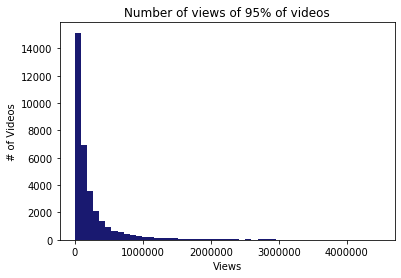

In [11]:
ax = sns.distplot(ca_videos[ca_videos["views"] < 4.5e6]["views"], kde = False, color = 'midnightblue', 
                  hist_kws = {'alpha': 1})
ax.set(xlabel = 'Views', ylabel = '# of Videos')
ax.set(title = "Number of views of 95% of videos")
plt.show()

### Likes Distribution

In [12]:
print('Skewness: ', ca_videos['likes'].skew())
print('Kurtosis: ', ca_videos['likes'].kurtosis())
ca_videos['likes'].describe(percentiles=[.15,.30,.5,.65,.80, .95])

Skewness:  24.963208665723148
Kurtosis:  816.1561544527424


count    3.452600e+04
mean     1.218736e+04
std      1.171086e+05
min      0.000000e+00
15%      1.990000e+02
30%      5.510000e+02
50%      1.389500e+03
65%      2.505250e+03
80%      4.680000e+03
95%      1.761375e+04
max      5.150839e+06
Name: likes, dtype: float64

Here we can see that the minimum number of likes is 0 but that is likely because some videos have that feature disables. The max can reach as high as 5,053,338. 

95% of videos 165,236 likes or less, while 80% have 38,557 likes. This shows us that the majority of videos do not require a huge amount of likes to become trending. 

We will visualize the spread of videos with 200,000 likes or less. 

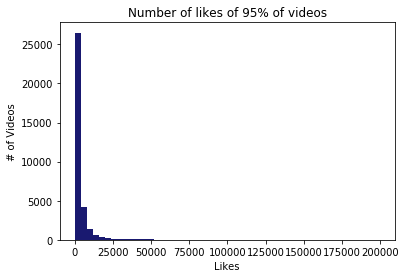

In [13]:
ax = sns.distplot(ca_videos[ca_videos["likes"] < 2e5]["likes"], kde = False, color = 'midnightblue', 
                  hist_kws = {'alpha': 1})
ax.set(xlabel = 'Likes', ylabel = '# of Videos')
ax.set(title = "Number of likes of 95% of videos")
plt.show()

### Dislikes Distribution

In [14]:
print('Skewness: ', ca_videos['dislikes'].skew())
print('Kurtosis: ', ca_videos['dislikes'].kurtosis())
ca_videos['dislikes'].describe(percentiles=[.15,.30,.5,.65,.80, .95])

Skewness:  87.79501116779387
Kurtosis:  8387.115641772418


count    3.452600e+04
mean     5.393762e+02
std      1.371662e+04
min      0.000000e+00
15%      1.000000e+01
30%      2.800000e+01
50%      6.500000e+01
65%      1.120000e+02
80%      2.280000e+02
95%      8.550000e+02
max      1.470388e+06
Name: dislikes, dtype: float64

The minimum number of dislikes can be as low as 0 and as high as 1,602,383. The majority, however, have fewer than 6,468 dislikes. So only 5% if videos are between 6,000-1,000,000. Again 80% of videos have 1,288 ldislikes or less. So, it's less common to have dislikes on trending videos. 

Now we will visualize the distribution of videos with less than 6000 dislikes

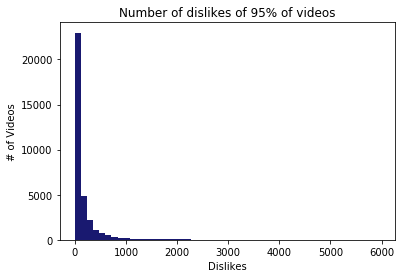

In [15]:
ax = sns.distplot(ca_videos[ca_videos["dislikes"] < 6e3]["dislikes"], kde = False, color = 'midnightblue', 
                  hist_kws = {'alpha': 1})
ax.set(xlabel = 'Dislikes', ylabel = '# of Videos')
ax.set(title = "Number of dislikes of 95% of videos")
plt.show()

### Comment Count Distribution

In [16]:
print('Skewness: ', ca_videos['comment_count'].skew())
print('Kurtosis: ', ca_videos['comment_count'].kurtosis())
ca_videos['comment_count'].describe(percentiles=[.15,.30,.5,.65,.80, .95])

Skewness:  35.68694322645301
Kurtosis:  1546.7333547451653


count    3.452600e+04
mean     2.026034e+03
std      2.151876e+04
min      0.000000e+00
15%      5.100000e+01
30%      1.400000e+02
50%      3.450000e+02
65%      6.060000e+02
80%      1.168000e+03
95%      4.251000e+03
max      1.142274e+06
Name: comment_count, dtype: float64

Comment count can go from as low as 0 to as high as 1,114,800. The majority have a count of 19,189 comments or less, while 80% have a comment count of 4,823 or less. 

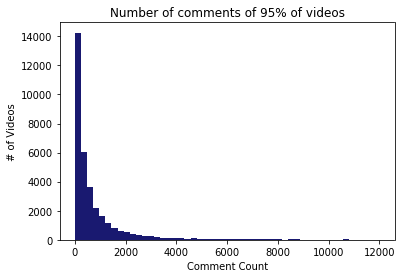

In [17]:
ax = sns.distplot(ca_videos[ca_videos["comment_count"] < 1.2e4]["comment_count"], kde = False, color = 'midnightblue',
                  hist_kws = {'alpha': 1})
         
ax.set(xlabel = 'Comment Count', ylabel = '# of Videos')
ax.set(title = "Number of comments of 95% of videos")
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(ca_videos.select_dtypes(include = ['number']))
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const            11.318741
category_id       1.014176
views             5.053018
likes            11.851851
dislikes          2.034455
comment_count     8.868258
dtype: float64

## Dislikes Ratio

In [19]:
ca_videos['dislikes_ratio'] = ca_videos['dislikes']/(ca_videos['likes']+ ca_videos['dislikes'])
ca_videos[ca_videos['dislikes_ratio'].apply(lambda x: pd.isna(x))]


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name,dislikes_ratio
23,WSasKXK0nhI,17.14.11,(ьЌьИЕэДьЄ) ьДыЊ ыАьД ыЌИьЌьИ ьЁьы...,ьЄьАНьЄьЙМыМьИь TV,25,2017-11-13,"ьЄьАНьЄ|""ьЙМыМ""|""ьЄьЙМьИ""|""ьЄьАНьЄьЙМы...",56248,0,0,526,https://i.ytimg.com/vi/WSasKXK0nhI/default.jpg,False,True,ьДыЊ ыАьД ъАьЅь ъАьЇ ьъГ ьДьыЈ...,News & Politics,NaN
29,d5bsz2nJvrM,17.14.11,щЁНхМКчхАчхН! хЉДхПщ шЊхЗБхцАфЛхІ...,щОчфМ фКК,22,2017-11-12,[none],8266,0,0,0,https://i.ytimg.com/vi/d5bsz2nJvrM/default.jpg,False,False,NaN,People & Blogs,NaN
81,hhzDPJdt42k,17.14.11,ьы эьИь эЈыьыь ыыЄ.,эЈыьы,22,2017-11-13,[none],28569,0,0,732,https://i.ytimg.com/vi/hhzDPJdt42k/default.jpg,False,True,ъЗИыь ыЊИьэъА ыЇьД ьЂьЇььь ...,People & Blogs,NaN
112,4CWYylzQh7g,17.14.11,[хЕ/ьыМь] ьЗ ъГ ыЅДыЄъА ыЙЁьЙ ьЄы И...,17 6,22,2017-11-12,[none],9763,0,0,9,https://i.ytimg.com/vi/4CWYylzQh7g/default.jpg,False,True,ьь / 141018 ьыМьыььМъАы \nьЖь...,People & Blogs,NaN
126,vxfDYCYvdMw,17.14.11,ыыьД ьэыъВ ьъИД ъЙьЂ э (ъЗь...,Da moon,22,2017-11-12,[none],30848,0,0,65,https://i.ytimg.com/vi/vxfDYCYvdMw/default.jpg,False,True,ьВььДьМ ьэъБАтЁ ыЇэЌыГДьИь у у...,People & Blogs,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34417,nOUlB0i2MaA,18.14.06,2018 ъЕ­ыЏМь ь э - ь ъБАыАЉьЁ 'ьь ъ...,SBS ыДьЄ,25,2018-06-13,"ыДьЄ|""NEWS""|""news""|""SBS""|""sbs""|""SBS NEWS""|""S...",433188,0,0,175,https://i.ytimg.com/vi/nOUlB0i2MaA/default.jpg,False,True,'ь ъБАыАЉьЁь ыЊ ъА' SBSъА ьЈыЄ! SBSъА...,News & Politics,NaN
34503,gmwir9WzIdg,18.14.06,эИыМэъА ыЌМыЌьАыЄ? ьыыЄ ьДъВы...,CFIPыДьЄ,25,2018-06-12,"cfip|""эъЕ­""|""ыЖэ""|""ыЏИъЕ­""|""ьЄъЕ­""|""ьМы...",40594,0,0,0,https://i.ytimg.com/vi/gmwir9WzIdg/default.jpg,True,True,эИыМэъА ьДыВ эыДьь ыыЌД ьыГД...,News & Politics,NaN
34531,hWpPf2jKhh0,18.14.06,ъАыАЉ ьАыЄъГ ьЙДыыЁ 500ыЇь ыьЖэ ...,эыы,24,2018-06-12,[none],27327,0,0,31,https://i.ytimg.com/vi/hWpPf2jKhh0/default.jpg,False,True,NaN,Entertainment,NaN
34534,f-KTeeUQE3Q,18.14.06,(ъИДъИьЇыЈ) эИыМэ+ъЙь ььД ыЄ ыЇь...,ьЄьАНьЄьЙМыМьИь TV,25,2018-06-12,"ьЄьАНьЄ|""ьЙМыМ""|""ьЄьЙМьИ""|""ьЄьАНьЄьЙМы...",47086,0,0,601,https://i.ytimg.com/vi/f-KTeeUQE3Q/default.jpg,False,True,(ъИДъИьЇыЈ) эИыМэ+ъЙь ььД ыЄ ыЇь...,News & Politics,NaN


As expected, the dislikes ratio has null values, because some videos have 0 likes and dislikes. To correct this, we will replace all null values with the value zero.

In [20]:
ca_videos['dislikes_ratio'] = ca_videos['dislikes_ratio'].fillna(value = 0)

## Comment Count Ratio

In [21]:
ca_videos['comment_ratio'] = ca_videos['comment_count']/(ca_videos['comment_count']+ ca_videos['views'])


## Most trending categories

[Text(0.5, 1.0, 'Most Trending Categories')]

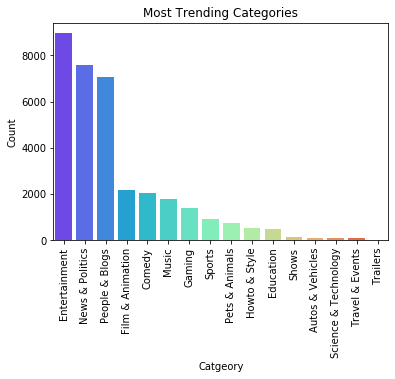

In [22]:
ax = sns.countplot(ca_videos["category_name"], palette = "rainbow",
                   order= ca_videos['category_name'].value_counts().index)
ax.set(xlabel = "Catgeory", ylabel = "Count")
plt.xticks(rotation = 90)
ax.set(title = "Most Trending Categories")


### Title Length

In [23]:
ca_videos['title_length'] = ca_videos.title.apply(lambda x: len(x))
ca_videos['title_length'].describe(percentiles=[.15,.30,.5,.65,.80, .95])

count    34526.000000
mean        85.568991
std         38.396227
min          2.000000
15%         49.000000
30%         63.000000
50%         80.000000
65%         93.000000
80%        113.000000
95%        157.000000
max        280.000000
Name: title_length, dtype: float64

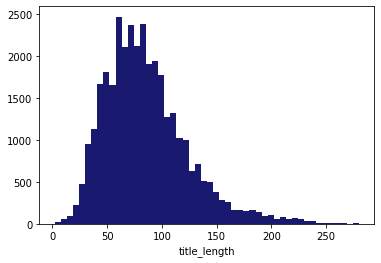

In [24]:
ax = sns.distplot(ca_videos.title_length, kde = False, color = 'midnightblue',
                  hist_kws = {'alpha': 1})

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

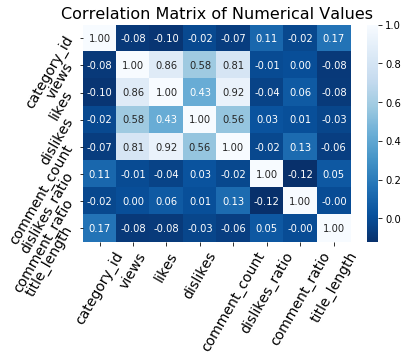

In [25]:
sns.heatmap(ca_videos.select_dtypes(include = ['number']).corr(method = 'pearson'), fmt='0.2f', cmap = 'Blues_r', annot=True)
plt.title('Correlation Matrix of Numerical Values', fontsize=16)

plt.yticks(fontsize=14, rotation=60)
plt.xticks(fontsize=14, rotation = 60)